In [ ]:
import pandas as pd
import numpy as  np
import tensorflow as tf
import matplotlib.pyplot as plt
import sklearn.model_selection as sk
#tf.compat.v1.enable_eager_execution()
pd.set_option('display.max_columns', 15)
pd.set_option('display.max_rows', 10)

In [ ]:
from google.colab import files
files.upload()
data=pd.read_csv("Design1a_Para2_S21.csv")
data

Saving Design1a_Para2_S21.csv to Design1a_Para2_S21 (4).csv


,Freq [GHz],"dB(S(FloquetPort2:1,FloquetPort1:1)) [] - g1='0mm' g2='0mm' s1='1mm' s2='0.5mm'","dB(S(FloquetPort2:1,FloquetPort1:1)) [] - g1='0mm' g2='0mm' s1='2mm' s2='0.5mm'","dB(S(FloquetPort2:1,FloquetPort1:1)) [] - g1='0mm' g2='0mm' s1='3mm' s2='0.5mm'","dB(S(FloquetPort2:1,FloquetPort1:1)) [] - g1='0mm' g2='0mm' s1='4mm' s2='0.5mm'","dB(S(FloquetPort2:1,FloquetPort1:1)) [] - g1='0mm' g2='0mm' s1='5mm' s2='0.5mm'","dB(S(FloquetPort2:1,FloquetPort1:1)) [] - g1='0mm' g2='0mm' s1='1mm' s2='1mm'",...,"dB(S(FloquetPort2:1,FloquetPort1:1)) [] - g1='10mm' g2='2mm' s1='4mm' s2='1.5mm'","dB(S(FloquetPort2:1,FloquetPort1:1)) [] - g1='10mm' g2='2mm' s1='5mm' s2='1.5mm'","dB(S(FloquetPort2:1,FloquetPort1:1)) [] - g1='10mm' g2='2mm' s1='1mm' s2='2mm'","dB(S(FloquetPort2:1,FloquetPort1:1)) [] - g1='10mm' g2='2mm' s1='2mm' s2='2mm'","dB(S(FloquetPort2:1,FloquetPort1:1)) [] - g1='10mm' g2='2mm' s1='3mm' s2='2mm'","dB(S(FloquetPort2:1,FloquetPort1:1)) [] - g1='10mm' g2='2mm' s1='4mm' s2='2mm'","dB(S(FloquetPort2:1,FloquetPort1:1)) [] - g1='10mm' g2='2mm' s1='5mm' s2='2mm'"
0,1.0,-inf,-inf,-inf,-inf,-inf,-inf,...,-1.162021,-1.399727,-0.773223,-1.028858,-1.145530,-1.295512,-1.712422
1,1.1,-inf,-inf,-inf,-inf,-inf,-inf,...,-1.481307,-1.801839,-0.956926,-1.278987,-1.436946,-1.641933,-2.179723
2,1.2,-inf,-inf,-inf,-inf,-inf,-inf,...,-1.868085,-2.297861,-1.167445,-1.568240,-1.779575,-2.057079,-2.744214
3,1.3,-inf,-inf,-inf,-inf,-inf,-inf,...,-2.337269,-2.911946,-1.407813,-1.901746,-2.181853,-2.554778,-3.427390
4,1.4,-inf,-inf,-inf,-inf,-inf,-inf,...,-2.908003,-3.676443,-1.681577,-2.285596,-2.654119,-3.152574,-4.257601
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
186,19.6,-inf,-inf,-inf,-inf,-inf,-inf,...,-14.145785,-4.052525,-0.339645,-1.882012,-0.990868,-0.939139,-0.074768
187,19.7,-inf,-inf,-inf,-inf,-inf,-inf,...,-20.280597,-1.298253,-0.379687,-12.386174,-0.785210,-1.664051,-0.079466
188,19.8,-inf,-inf,-inf,-inf,-inf,-inf,...,-3.103160,-0.278496,-0.561133,-0.383659,-1.398534,-3.167465,-0.270965
189,19.9,-inf,-inf,-inf,-inf,-inf,-inf,...,-8.823352,-0.063454,-0.564289,-0.237429,-2.228234,-21.069916,-0.604613


In [ ]:
def clean_data(data):
    data=data.replace([-np.inf], np.nan)
    data=data.dropna(axis=1, how='all')
    data.isnull().to_numpy().any()
    return data

In [ ]:
def output_parameters(data):
    output=np.empty((0,4), float)
    for columns in data.columns[1:]:
        params=columns.split(' ')[3:]
        param=[]
        for vals in params:
            param.append(float(vals.split('=')[1][1:-3]))
        param=np.array([param])
        output=np.concatenate((output, param), axis=0)
    return output

In [ ]:
data = clean_data(data)
X = output_parameters(data)
data

,Freq [GHz],"dB(S(FloquetPort2:1,FloquetPort1:1)) [] - g1='2mm' g2='0mm' s1='1mm' s2='0.5mm'","dB(S(FloquetPort2:1,FloquetPort1:1)) [] - g1='2mm' g2='0mm' s1='2mm' s2='0.5mm'","dB(S(FloquetPort2:1,FloquetPort1:1)) [] - g1='2mm' g2='0mm' s1='3mm' s2='0.5mm'","dB(S(FloquetPort2:1,FloquetPort1:1)) [] - g1='2mm' g2='0mm' s1='4mm' s2='0.5mm'","dB(S(FloquetPort2:1,FloquetPort1:1)) [] - g1='2mm' g2='0mm' s1='5mm' s2='0.5mm'","dB(S(FloquetPort2:1,FloquetPort1:1)) [] - g1='2mm' g2='0mm' s1='1mm' s2='1mm'",...,"dB(S(FloquetPort2:1,FloquetPort1:1)) [] - g1='10mm' g2='2mm' s1='4mm' s2='1.5mm'","dB(S(FloquetPort2:1,FloquetPort1:1)) [] - g1='10mm' g2='2mm' s1='5mm' s2='1.5mm'","dB(S(FloquetPort2:1,FloquetPort1:1)) [] - g1='10mm' g2='2mm' s1='1mm' s2='2mm'","dB(S(FloquetPort2:1,FloquetPort1:1)) [] - g1='10mm' g2='2mm' s1='2mm' s2='2mm'","dB(S(FloquetPort2:1,FloquetPort1:1)) [] - g1='10mm' g2='2mm' s1='3mm' s2='2mm'","dB(S(FloquetPort2:1,FloquetPort1:1)) [] - g1='10mm' g2='2mm' s1='4mm' s2='2mm'","dB(S(FloquetPort2:1,FloquetPort1:1)) [] - g1='10mm' g2='2mm' s1='5mm' s2='2mm'"
0,1.0,-26.899047,-21.738253,-18.556836,-16.289351,-14.415687,-28.692293,...,-1.162021,-1.399727,-0.773223,-1.028858,-1.145530,-1.295512,-1.712422
1,1.1,-26.068833,-20.907403,-17.723808,-15.450868,-13.571228,-27.861928,...,-1.481307,-1.801839,-0.956926,-1.278987,-1.436946,-1.641933,-2.179723
2,1.2,-25.310477,-20.148358,-16.962408,-14.683555,-12.797495,-27.103407,...,-1.868085,-2.297861,-1.167445,-1.568240,-1.779575,-2.057079,-2.744214
3,1.3,-24.612427,-19.449567,-16.261093,-13.975885,-12.083003,-26.405176,...,-2.337269,-2.911946,-1.407813,-1.901746,-2.181853,-2.554778,-3.427390
4,1.4,-23.965701,-18.802051,-15.610893,-13.318908,-11.418845,-25.758255,...,-2.908003,-3.676443,-1.681577,-2.285596,-2.654119,-3.152574,-4.257601
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
186,19.6,-0.321875,-1.548532,-7.952840,-21.568599,-18.472182,-0.438480,...,-14.145785,-4.052525,-0.339645,-1.882012,-0.990868,-0.939139,-0.074768
187,19.7,-0.293934,-1.631440,-8.234867,-17.505902,-14.123273,-0.407896,...,-20.280597,-1.298253,-0.379687,-12.386174,-0.785210,-1.664051,-0.079466
188,19.8,-0.266269,-1.725217,-8.533635,-13.911005,-5.799198,-0.378492,...,-3.103160,-0.278496,-0.561133,-0.383659,-1.398534,-3.167465,-0.270965
189,19.9,-0.239161,-1.830872,-8.848792,-10.397368,-16.825132,-0.350309,...,-8.823352,-0.063454,-0.564289,-0.237429,-2.228234,-21.069916,-0.604613


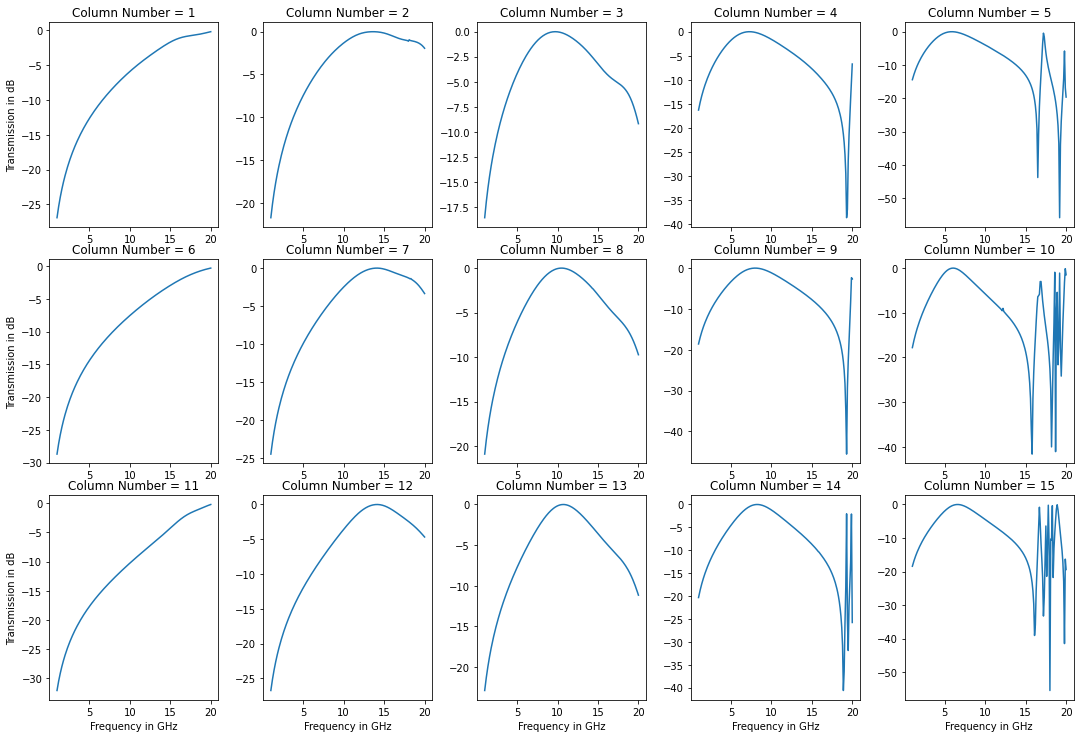

In [ ]:
rows=3
columns=5
fig, window =  plt.subplots(rows, columns, figsize=(15,10))
fig.tight_layout()
for x in range(0,rows):
    for y in range(0, columns):
        index=1+x*columns+y
        window[x][y].title.set_text("Column Number = %d" % index)
        window[x][y].plot(data.iloc[:, 0], data.iloc[:, index])
plt.setp(window[-1, :], xlabel='Frequency in GHz');
plt.setp(window[:, 0], ylabel='Transmission in dB');

In [ ]:
output_data = np.empty((0,4),float)
index_range = np.empty((0,2), int)
indices = []
input_data = np.empty((0,2), float)
r1 = -0.45
r2 = -0.40
for index in range(1, data.shape[1]):
    temp = []
    ix = []
    freq = []
    found = False
    for i, val in enumerate(data.iloc[:, index]):
        if r1 <= val:
            found = True
            temp.append(val)
            ix.append(i)
            freq.append(data.iloc[i, 0])
            continue
        if found:
            break
    if len(temp) >= 2 and temp[-1] < r2:
        freq = np.array([[freq[0], freq[-1]]])
        ix = np.array(([[ix[0], ix[-1]]]))
        indices.append(index)
        index_range = np.concatenate((index_range, ix))
        input_data = np.concatenate((input_data, freq))
        output_data = np.concatenate((output_data, X[index-1:index]))
# print(output_data)
# print(index_range)
# print(input_data)
# print(indices)
print('''Total data points = %d
Useful data points = %d
Loss in data points = %d'''
%(data.shape[1]-1, len(indices),
data.shape[1]-1-len(indices)))

Total data points = 580
Useful data points = 329
Loss in data points = 251


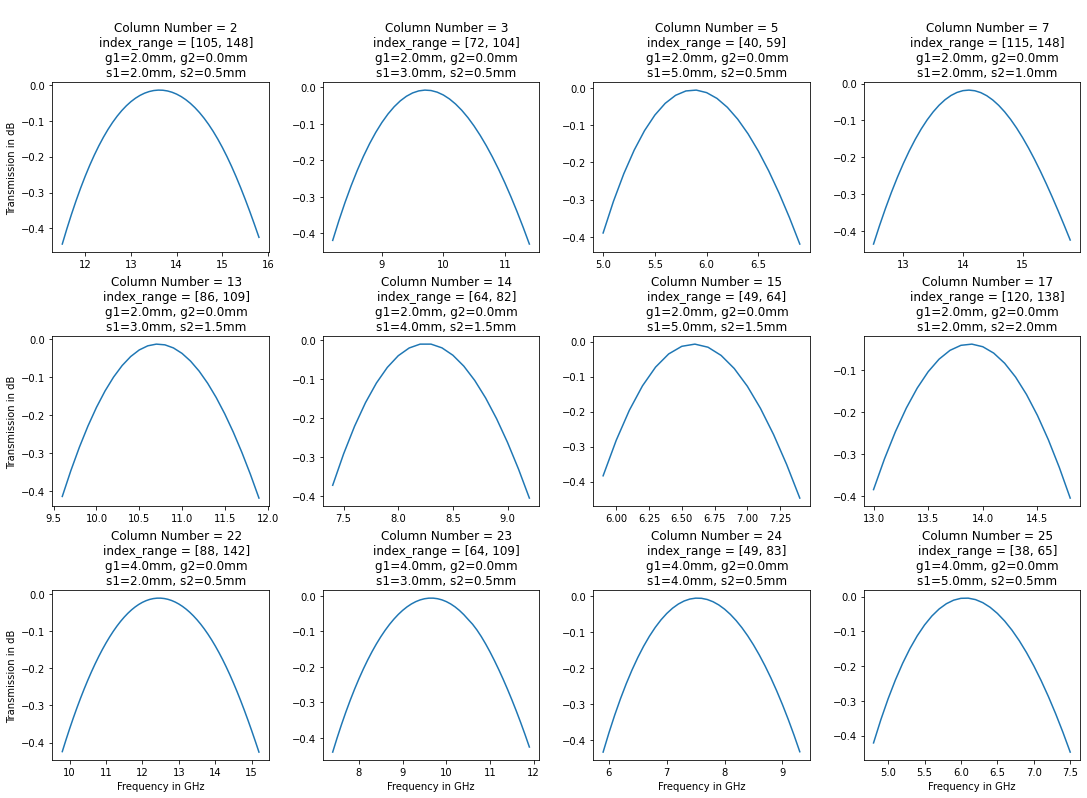

In [ ]:
rows = 3
columns = 4
fig, window =  plt.subplots(rows, columns, figsize=(15,10))
fig.tight_layout()
for x in range(0,rows):
    for y in range(0, columns):
        position = x*columns+y
        column_index = indices[position]
        start = index_range[position][0]
        end = index_range[position][1]
        params=output_data[position]
        window[x][y].plot(data.iloc[start:end+1, 0], data.iloc[start:end+1, column_index])
        window[x][y].title.set_text('''
        Column Number = %d
        index_range = [%d, %d]
        g1=%.1fmm, g2=%.1fmm
        s1=%.1fmm, s2=%.1fmm''' 
        % (column_index, start, end, *params))
plt.subplots_adjust(wspace=0.25, hspace=0.5)
plt.setp(window[-1, :], xlabel='Frequency in GHz');
plt.setp(window[:, 0], ylabel='Transmission in dB');

In [ ]:
Normalize=True
normalized_output = np.copy(output_data)
if Normalize:
  mean=[]
  sigma=[]
  for column in range(0,4):
    m = np.mean(output_data[:,column])
    s = np.max(output_data[:,column]) - np.min(output_data[:,column])
    mean.append(m)
    sigma.append(s)
    normalized_output[:,column]=(output_data[:,column]-m)/s
normalized_output

array([[-0.1787234 , -0.51671733, -0.2606383 , -0.48733536],
       [-0.1787234 , -0.51671733, -0.0106383 , -0.48733536],
       [-0.1787234 , -0.51671733,  0.4893617 , -0.48733536],
       ...,
       [ 0.4212766 ,  0.48328267, -0.2606383 ,  0.51266464],
       [ 0.4212766 ,  0.48328267,  0.2393617 ,  0.51266464],
       [ 0.6212766 ,  0.48328267, -0.2606383 , -0.48733536]])

In [ ]:
Normalize_input=True
normalized_input = np.copy(input_data)
if Normalize_input:
  input_mean=[]
  input_sigma=[]
  for column in range(0,2):
      m = np.mean(input_data[:,column])
      s = np.max(input_data[:,column]) - np.min(input_data[:,column])
      input_mean.append(m)
      input_sigma.append(s)
      normalized_input[:,column]=(input_data[:,column]-m)/s
normalized_input[0:10,:]

array([[0.58000935, 0.5360072 ],
       [0.3261632 , 0.29019714],
       [0.08000935, 0.0388005 ],
       [0.65693243, 0.5360072 ],
       [0.43385551, 0.3181301 ],
       [0.26462474, 0.16729212],
       [0.14924012, 0.06673346],
       [0.69539397, 0.48014128],
       [0.44924012, 0.50248765],
       [0.26462474, 0.3181301 ]])

In [ ]:
cleaned_data = np.concatenate((output_data, input_data), axis=1)
cleaned_data = pd.DataFrame(cleaned_data, columns=['g1 (mm)', 'g2 (mm)',
                                                   's1 (mm)', 's2 (mm)', 
                                                   'freq1 (GHz)', 'freq2 (GHz)'])
cleaned_data

,g1 (mm),g2 (mm),s1 (mm),s2 (mm),freq1 (GHz),freq2 (GHz)
0,2.0,0.0,2.0,0.5,11.5,15.8
1,2.0,0.0,3.0,0.5,8.2,11.4
2,2.0,0.0,5.0,0.5,5.0,6.9
3,2.0,0.0,2.0,1.0,12.5,15.8
4,2.0,0.0,3.0,1.5,9.6,11.9
...,...,...,...,...,...,...
324,8.0,2.0,4.0,1.5,5.6,8.3
325,8.0,2.0,1.0,2.0,8.2,10.5
326,8.0,2.0,2.0,2.0,7.3,9.7
327,8.0,2.0,4.0,2.0,5.7,8.2


In [ ]:
for index in range(0,4):
  print(cleaned_data[cleaned_data.columns[index]].value_counts())

4.0     77
2.0     74
0.0     69
6.0     58
8.0     34
10.0    17
Name: g1 (mm), dtype: int64
2.0    72
1.5    66
1.0    65
0.5    64
0.0    62
Name: g2 (mm), dtype: int64
3.0    71
5.0    68
2.0    66
4.0    64
1.0    60
Name: s1 (mm), dtype: int64
0.5    89
2.0    82
1.0    81
1.5    77
Name: s2 (mm), dtype: int64


In [ ]:
from sklearn.model_selection import train_test_split
def data():
  return train_test_split(normalized_input, normalized_output, test_size=0.20, shuffle=True)

In [ ]:
def learn(epochs):
  model = tf.keras.Sequential()
  model.add(tf.keras.layers.Dense(16,input_shape=(2,),activation='relu'))
  model.add(tf.keras.layers.Dense(128,activation='relu'))
  model.add(tf.keras.layers.Dense(512,activation='relu'))
  model.add(tf.keras.layers.Dense(128,activation='relu'))
  model.add(tf.keras.layers.Dense(4,activation='tanh'))
  model.compile(loss='mse', optimizer='RMSProp')
  history=model.fit(X_train, y_train, validation_split=0.20, epochs=epochs,
                    verbose=0, shuffle=True)
  return model, history

In [ ]:
def input(inp, mean, sigma, Normalize):
  if Normalize:
    op=np.copy(inp)
    for column in range(0,2):
      op[:,column] = (inp[:,column]-mean[column])/(sigma[column])
    return op
  return inp
    
def output(prediction, mean, sigma, Normalize):
  if Normalize:
    op=np.copy(prediction[:])
    for column in range(0,4):
          op[:,column] = (prediction[:,column]*sigma[column])+mean[column]
    return op
  return prediction

In [ ]:
acceptable_loss = 0.95
epochs = 150
from sklearn.metrics import mean_squared_error as mse
X_train, X_test, y_train, y_test = data()
model, history = learn(epochs)
prediction = output(model.predict(X_test), mean, sigma, Normalize)
y = output(y_test, mean, sigma, Normalize)
test_loss = mse(prediction, y, squared=False)
while test_loss >= acceptable_loss:
  print("Test Loss very high, trying again. [test loss = %f]" % test_loss)
  X_train, X_test, y_train, y_test = data()
  model, history = learn(epochs)
  prediction = output(model.predict(X_test), mean, sigma, Normalize)
  y = output(y_test, mean, sigma, Normalize)
  test_loss = mse(prediction, y, squared=False)
print("test loss g1= %0.1f, precision= %0.1f" % (mse(prediction[:,0], y[:,0], squared=False), 2))
print("test loss g2= %0.1f, precision= %0.1f" % (mse(prediction[:,1], y[:,1], squared=False), 0.5))
print("test loss s1= %0.1f, precision= %0.1f" % (mse(prediction[:,2], y[:,2], squared=False), 1))
print("test loss s2= %0.1f, precision= %0.1f" % (mse(prediction[:,3], y[:,3], squared=False), 0.5))
print("test loss avg= %f" % test_loss)

Test Loss very high, trying again. [test loss = 1.176860]
Test Loss very high, trying again. [test loss = 1.141788]
test loss g1= 1.5, precision= 2.0
test loss g2= 0.6, precision= 0.5
test loss s1= 0.9, precision= 1.0
test loss s2= 0.5, precision= 0.5
test loss avg= 0.946368


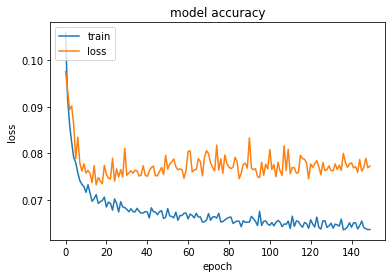

In [ ]:
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model accuracy')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'loss'], loc='upper left')
plt.show()

In [ ]:
inp=np.array([[2,4],[3,6],[8,10],[2,18],[10,15],[15,19],[18,19],[7,18],[9,16],[11,12],[17,18]], dtype=np.float)
normal_input = input(inp, input_mean, input_sigma, Normalize_input)
normal_output = model.predict(normal_input)
result = output(normal_output, mean, sigma, Normalize)
result = result.round(1)
result = np.where(result<=0, 0, result)
result

array([[2. , 1.5, 3.1, 1.1],
       [6.1, 0.6, 4.3, 0.8],
       [2.9, 0.6, 3.3, 1.7],
       [7.5, 0.3, 0.6, 0. ],
       [4.9, 0.1, 1.8, 1.1],
       [2.9, 0. , 1.2, 1.7],
       [0. , 0. , 1.4, 2.3],
       [8.8, 0. , 0.9, 0.1],
       [6.2, 0. , 1.5, 0.4],
       [0.3, 0.1, 3.1, 2. ],
       [0. , 0. , 1.6, 2.3]], dtype=float32)

In [ ]:
model.save('good.h5')
files.download('good.h5')


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>